### Qinhui Xu 09/19/2018

#### Data Source: https://www.kaggle.com/mlg-ulb/creditcardfraud

As I mentioned in dealing with imbalance step shows, I will prepare two dataset - one come from cluster based undersampling - the other one come from only SMOTE method.

I will use following different models to make predictions:

1. Logistic Regression
2. Gradient Boosting Machine
3. Random Forest Model
4. XGBoost
5. Neural Network

#### Data Preprocessing

- Feature Engineering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score,accuracy_score
from sklearn.metrics import confusion_matrix

C:\Users\Tiffany Xu\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# Data Preprocessing based on Data Exploration / Feature Engineering
df = pd.read_csv("C:/Users/Tiffany Xu/Documents/MachineLearningStudy/DeepLearning/creditcard.csv")

df['V1_'] = df.V1.map(lambda x: 1 if x < -3 else 0)
df['V2_'] = df.V2.map(lambda x: 1 if x > 2.5 else 0)
df['V3_'] = df.V3.map(lambda x: 1 if x < -4 else 0)
df['V4_'] = df.V4.map(lambda x: 1 if x > 2.5 else 0)
df['V5_'] = df.V5.map(lambda x: 1 if x < -4.5 else 0)
df['V6_'] = df.V6.map(lambda x: 1 if x < -2.5 else 0)
df['V7_'] = df.V7.map(lambda x: 1 if x < -3 else 0)
df['V9_'] = df.V9.map(lambda x: 1 if x < -2 else 0)
df['V10_'] = df.V10.map(lambda x: 1 if x < -2.5 else 0)
df['V11_'] = df.V11.map(lambda x: 1 if x > 2 else 0)
df['V12_'] = df.V12.map(lambda x: 1 if x < -2 else 0)
df['V14_'] = df.V14.map(lambda x: 1 if x < -2.5 else 0)
df['V16_'] = df.V16.map(lambda x: 1 if x < -2 else 0)
df['V17_'] = df.V17.map(lambda x: 1 if x < -2 else 0)
df['V18_'] = df.V18.map(lambda x: 1 if x < -2 else 0)
df['V19_'] = df.V19.map(lambda x: 1 if x > 1.5 else 0)
df['V21_'] = df.V21.map(lambda x: 1 if x > 0.6 else 0)

df['normalized_amount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1,1))
df = df.drop(['Amount','Time'], axis=1)

df_nn = df
df = df.drop(['V28','V27','V26','V25','V24','V23','V22','V20','V15','V13','V8'], axis =1)

- Cluster Based on Undersampling

In [4]:
##### K-mean Cluster Based on Undersampling
import h2o
h2o.init()
import imp
from h2o.estimators.kmeans import H2OKMeansEstimator

df_notfraud = df[df["Class"]==0]
df_fraud = df[df["Class"]==1]

df_kmeans_notfraud = df_notfraud.drop(['Class'], axis=1)
hf = h2o.H2OFrame(df_kmeans_notfraud)
cls = H2OKMeansEstimator(k=len(df_fraud), standardize=True)
cls.train(x=hf.columns, training_frame=hf)

df_centers = pd.DataFrame(cls.centers())
df_centers.columns = hf.columns
df_centers["Class"] = 0
df_kmeans_undersample = pd.concat([df_centers,df_fraud],axis=0)

X_Kmeans_under = df_kmeans_undersample.loc[:,df_kmeans_undersample.columns != 'Class']
y_Kmeans_under = df_kmeans_undersample.loc[:,df_kmeans_undersample.columns == 'Class']

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,3 mins 52 secs
H2O cluster timezone:,America/New_York
H2O data parsing timezone:,UTC
H2O cluster version:,3.20.0.2
H2O cluster version age:,3 months and 8 days
H2O cluster name:,H2O_from_python_Tiffany_Xu_dnartp
H2O cluster total nodes:,1
H2O cluster free memory:,3.366 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"locked, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%
kmeans Model Build progress: |████████████████████████████████████████████| 100%


In [5]:
df_X_Kmenas = pd.DataFrame(X_Kmeans_under,columns = df_kmeans_notfraud.columns)
df_Y_Kmenas = pd.DataFrame(y_Kmeans_under,columns = ["Class"])
df_Kmeans = pd.concat([df_X_Kmenas,df_Y_Kmenas],axis=1)

In [6]:
df_Kmeans.head()

,V1,V2,V3,V4,V5,V6,V7,V9,V10,V11,...,V11_,V12_,V14_,V16_,V17_,V18_,V19_,V21_,normalized_amount,Class
0,1.361239,-0.213999,-0.159597,0.572173,-0.292153,-0.243940,-0.146892,0.591521,-0.104564,0.050794,...,2.463307e-16,1.526557e-16,-5.898060e-17,6.557255e-16,-4.857226e-17,1.092876e-16,-1.380840e-15,1.006140e-15,-0.118763,0
1,-35.548539,-31.850484,-48.325589,15.304184,-113.743307,73.301626,120.589494,-3.872425,-12.005487,6.853897,...,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,102.362243,0
2,-36.802320,-63.344698,-20.645794,16.715537,-20.672064,7.694002,24.956587,-2.687312,-8.423404,1.186360,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,78.235272,0
3,-37.558067,-29.335992,-24.962322,8.413616,-35.182120,21.550496,36.877368,5.046566,0.909474,3.919686,...,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,23.495155,0
4,-56.407510,-72.715728,-6.605265,16.491217,34.801666,-26.160506,-19.399981,6.967698,9.537780,3.089395,...,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,4.451791,0


- SMOTE: Oversampling

In [7]:
##### SMOTE
from imblearn.over_sampling import SMOTE

df_features = df.drop(['Class'], axis=1)
df_target = df["Class"]

sm = SMOTE(random_state=12, ratio=1.0)
x_res,y_res = sm.fit_sample(df_features,df_target)

C:\Users\Tiffany Xu\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


In [8]:
df_X_SMOTE = pd.DataFrame(x_res,columns = df_kmeans_notfraud.columns)
df_Y_SMOTE = pd.DataFrame(y_res,columns = ["Class"])
df_SMOTE = pd.concat([df_X_SMOTE,df_Y_SMOTE],axis=1)

In [9]:
df_SMOTE.head()

,V1,V2,V3,V4,V5,V6,V7,V9,V10,V11,...,V11_,V12_,V14_,V16_,V17_,V18_,V19_,V21_,normalized_amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.363787,0.090794,-0.551600,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,-0.255425,-0.166974,1.612727,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,-1.514654,0.207643,0.624501,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,-1.387024,-0.054952,-0.226487,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,0.817739,0.753074,-0.822843,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.073403,0


#### Logistic Regression

In [61]:
X_under_train, X_under_test, y_under_train, y_under_test = train_test_split(X_Kmeans_under,y_Kmeans_under,test_size = 0.3, random_state = 12)
lr = LogisticRegression()
lr.fit(X_under_train,y_under_train)
y_pred = lr.predict(X_under_test)
tn, fp, fn, tp = confusion_matrix(y_under_test, y_pred).ravel()

log_kmeans_recall =  tp/(tp+fn)
log_kmeans_spec = tn/(tn+fp)

print("Kmeans: Logistic Regression Sensitivity/Recall is:",log_kmeans_recall)
print("Kmeans: Logistic Regression Specificity is:",log_kmeans_spec)

Kmeans: Logistic Regression Sensitivity/Recall is: 0.9407894736842105
Kmeans: Logistic Regression Specificity is: 0.9027777777777778


In [57]:
x_train_res, x_val_res, y_train_res, y_val_res = train_test_split(x_res,
                                                    y_res,
                                                    test_size = .3,
                                                    random_state=12)

lr = LogisticRegression()
lr.fit(x_train_res,y_train_res)
y_pred = lr.predict(x_val_res)
tn, fp, fn, tp = confusion_matrix(y_val_res, y_pred).ravel()

log_smote_recall =  tp/(tp+fn)
log_smote_spec = tn/(tn+fp)

print("SMOTE: Logistic Regression Sensitivity/Recall is:",log_smote_recall)
print("SMOTE: Logistic Regression Specificity is:",log_smote_spec)

SMOTE: Logistic Regression Sensitivity/Recall is: 0.9192237421530965
SMOTE: Logistic Regression Specificity is: 0.9706824716859339


In [12]:
#### Kmeans H2OFrame
hf_Kmeans = h2o.H2OFrame(df_Kmeans)
hf_Kmeans["Class"] = hf_Kmeans["Class"].asfactor()

train_Kmeans, valid_Kmeans = hf_Kmeans.split_frame(
    ratios=[0.7], 
    seed=12, 
    destination_frames=['train_Kmeans.hex','valid_Kmeans.hex']
)

#### SMOTE H2OFrame
hf_SMOTE = h2o.H2OFrame(df_SMOTE)
hf_SMOTE["Class"] = hf_SMOTE["Class"].asfactor()

train_SMOTE, valid_SMOTE = hf_SMOTE.split_frame(
    ratios=[0.7], 
    seed=12, 
    destination_frames=['train_SMOTE.hex','valid_SMOTE.hex']
)

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


#### Gradient Boosting Machine

In [13]:
from h2o.estimators.gbm import H2OGradientBoostingEstimator

In [35]:
predictors = hf_Kmeans.columns
del predictors[-1]
response = "Class"

gbm = H2OGradientBoostingEstimator(
  ntrees = 10000,                                                            
  learn_rate = 0.01,                                                         
  stopping_rounds = 20, stopping_tolerance = 1e-4, stopping_metric = "AUC", 
  sample_rate = 0.8,
  col_sample_rate = 0.8,
  seed = 12,
  score_tree_interval = 10)

gbm.train(x=predictors, y=response, training_frame=train_Kmeans,
         validation_frame = valid_Kmeans)

perf = gbm.model_performance(valid = True)
#gbm.confusion_matrix(valid = True)

pred = gbm.predict(valid_Kmeans)
df_kmeans_pred = pred.as_data_frame()
kmeans_pred = df_kmeans_pred["p1"]>0.5
kmeans_pred = 1*kmeans_pred
kmeans_actual = valid_Kmeans["Class"].as_data_frame()
#Calculate recall and sensitivity
tn, fp, fn, tp = confusion_matrix(kmeans_actual,kmeans_pred).ravel()
gbm_kmeans_recall = tp/(tp+fn)
gbm_kmeans_spec = tn / (tn+fp)

print("Kmeans: GBM Sensitivity/Recall is:",gbm_kmeans_recall)
print("Kmeans: GBM Specificity is:",gbm_kmeans_spec)

gbm Model Build progress: |███████████████████████████████████████████████| 100%
gbm prediction progress: |████████████████████████████████████████████████| 100%
Kmeans: GBM Sensitivity/Recall is: 0.9794520547945206
Kmeans: GBM Specificity is: 0.96


In [36]:
predictors = hf_SMOTE.columns
del predictors[-1]
response = "Class"

gbm = H2OGradientBoostingEstimator(
  ntrees = 10000,                                               
  learn_rate = 0.01,                                                         
  stopping_rounds = 20, stopping_tolerance = 1e-4, stopping_metric = "AUC", 
  sample_rate = 0.8,
  col_sample_rate = 0.8,
  seed = 12,
  score_tree_interval = 10)

gbm.train(x=predictors, y=response, training_frame=train_SMOTE,
         validation_frame = valid_SMOTE)

perf = gbm.model_performance(valid = True)
#gbm.confusion_matrix(valid = True)

pred = gbm.predict(valid_SMOTE)
df_smote_pred = pred.as_data_frame()
smote_pred = df_smote_pred["p1"]>0.5
smote_pred = 1*smote_pred
smote_actual = valid_SMOTE["Class"].as_data_frame()
#Calculate recall and sensitivity
tn, fp, fn, tp = confusion_matrix(smote_actual,smote_pred).ravel()
gbm_smote_recall = tp/(tp+fn)
gbm_smote_spec = tn / (tn+fp)

print("SMOTE: GBM Sensitivity/Recall is:",gbm_smote_recall)
print("SMOTE: GBM Specificity is:",gbm_smote_spec)

gbm Model Build progress: |███████████████████████████████████████████████| 100%
gbm prediction progress: |████████████████████████████████████████████████| 100%
SMOTE: GBM Sensitivity/Recall is: 0.9957861222960951
SMOTE: GBM Specificity is: 0.996013453125735


#### Random Forest Model

In [38]:
from h2o.estimators.random_forest import H2ORandomForestEstimator

In [39]:
predictors = hf_Kmeans.columns
del predictors[-1]
response = "Class"

rf_kmeans = H2ORandomForestEstimator(
    model_id="rf_kmeans",
    ntrees = 10000, 
    stopping_rounds=20,
    score_each_iteration=True,
    seed=12)

rf_kmeans.train(x=predictors, y=response, training_frame=train_Kmeans,
         validation_frame = valid_Kmeans)

perf = rf_kmeans.model_performance(valid = True)
#rf_kmeans.confusion_matrix(valid = True)

pred = rf_kmeans.predict(valid_Kmeans)
df_kmeans_pred = pred.as_data_frame()
kmeans_pred = df_kmeans_pred["p1"]>0.5
kmeans_pred = 1*kmeans_pred
kmeans_actual = valid_Kmeans["Class"].as_data_frame()
#Calculate recall and sensitivity
tn, fp, fn, tp = confusion_matrix(kmeans_actual,kmeans_pred).ravel()
rf_kmeans_recall = tp/(tp+fn)
rf_kmeans_spec = tn / (tn+fp)

print("Kmeans: RFM Sensitivity/Recall is:",rf_kmeans_recall)
print("Kmeans: RFM Specificity is:",rf_kmeans_spec)

drf Model Build progress: |███████████████████████████████████████████████| 100%
drf prediction progress: |████████████████████████████████████████████████| 100%
Kmeans: RFM Sensitivity/Recall is: 0.9657534246575342
Kmeans: RFM Specificity is: 0.9466666666666667


In [40]:
predictors = hf_Kmeans.columns
del predictors[-1]
response = "Class"

rf_SMOTE = H2ORandomForestEstimator(
    model_id="rf_SMOTE",
    ntrees = 10000,      
    stopping_rounds=20,
    score_each_iteration=True,
    seed=12)

rf_SMOTE.train(x=predictors, y=response, training_frame=train_SMOTE,
         validation_frame = valid_SMOTE)

perf = rf_SMOTE.model_performance(valid = True)
#rf_SMOTE.confusion_matrix(valid = True)

pred = rf_SMOTE.predict(valid_SMOTE)
df_smote_pred = pred.as_data_frame()
smote_pred = df_smote_pred["p1"]>0.5
smote_pred = 1*smote_pred
smote_actual = valid_SMOTE["Class"].as_data_frame()
#Calculate recall and sensitivity
tn, fp, fn, tp = confusion_matrix(smote_actual,smote_pred).ravel()
rf_smote_recall = tp/(tp+fn)
rf_smote_spec = tn / (tn+fp)

print("SMOTE: RFM Sensitivity/Recall is:",rf_smote_recall)
print("SMOTE: RFM Specificity is:",rf_smote_spec)

drf Model Build progress: |███████████████████████████████████████████████| 100%
drf prediction progress: |████████████████████████████████████████████████| 100%
SMOTE: RFM Sensitivity/Recall is: 0.9999648843524674
SMOTE: RFM Specificity is: 0.9996707276918011


#### XGBoost

In [41]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

In [54]:
X_kmeans, y_kmeans = df_Kmeans.iloc[:,:-1],df_Kmeans.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X_kmeans, y_kmeans, test_size=0.3, random_state=12)


xg_kmeans = xgb.XGBRegressor(objective ='binary:logistic', subsample=1, learning_rate = 0.1,
                max_depth = 7, alpha = 10, n_estimators = 10)
xg_kmeans.fit(X_train,y_train)

preds = xg_kmeans.predict(X_test)

cm_kmeans = confusion_matrix(y_test, (preds>0.5))
xgb_kmeans_recall = recall_score(y_test, (preds>0.5))
xgb_kmeans_spec = cm_kmeans[0,0]/(cm_kmeans[0,0]+cm_kmeans[0,1])

print("Kmeans: XGBoost Sensitivity/Recall is:",xgb_kmeans_recall)
print("Kmeans: XGBoost Specificity is:",xgb_kmeans_spec)

Kmeans: XGBoost Sensitivity/Recall is: 1.0
Kmeans: XGBoost Specificity is: 0.9791666666666666


In [55]:
X_smote, y_smote = df_SMOTE.iloc[:,:-1],df_SMOTE.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.3, random_state=12)


xg_smote = xgb.XGBRegressor(objective ='binary:logistic', subsample=1, learning_rate = 0.1,
                max_depth = 7, alpha = 10, n_estimators = 10)
xg_smote.fit(X_train,y_train)

preds = xg_smote.predict(X_test)

cm_smote = confusion_matrix(y_test, (preds>0.5))
xgb_smote_recall = recall_score(y_test, (preds>0.5))
xgb_smote_spec = cm_kmeans[0,0]/(cm_kmeans[0,0]+cm_kmeans[0,1])

print("SMOTE: XGBoost Sensitivity/Recall is:",xgb_smote_recall)
print("SMOTE: XGBoost Specificity is:",xgb_smote_spec)

SMOTE: XGBoost Sensitivity/Recall is: 0.9733088166401199
SMOTE: XGBoost Specificity is: 0.9791666666666666


#### Neural Network

In [44]:
from h2o.estimators.deeplearning import H2ODeepLearningEstimator

In [45]:
##### K-mean Cluster Based on Undersampling - Neural Network Dataset
df_notfraud_nn = df_nn[df_nn["Class"]==0]
df_fraud_nn = df_nn[df_nn["Class"]==1]

df_kmeans_notfraud_nn = df_notfraud_nn.drop(['Class'], axis=1)
hf_nn = h2o.H2OFrame(df_kmeans_notfraud_nn)
cls_nn = H2OKMeansEstimator(k=len(df_fraud_nn), standardize=True)
cls_nn.train(x=hf_nn.columns, training_frame=hf_nn)

df_centers_nn = pd.DataFrame(cls_nn.centers())
df_centers_nn.columns = hf_nn.columns
df_centers_nn["Class"] = 0
df_kmeans_undersample_nn = pd.concat([df_centers_nn,df_fraud_nn],axis=0)

X_Kmeans_under_nn = df_kmeans_undersample_nn.loc[:,df_kmeans_undersample_nn.columns != 'Class']
y_Kmeans_under_nn = df_kmeans_undersample_nn.loc[:,df_kmeans_undersample_nn.columns == 'Class']

Parse progress: |█████████████████████████████████████████████████████████| 100%
kmeans Model Build progress: |████████████████████████████████████████████| 100%


In [46]:
df_X_Kmenas_nn = pd.DataFrame(X_Kmeans_under_nn,columns = df_kmeans_notfraud_nn.columns)
df_Y_Kmenas_nn = pd.DataFrame(y_Kmeans_under_nn,columns = ["Class"])
df_Kmeans_nn = pd.concat([df_X_Kmenas_nn,df_Y_Kmenas_nn],axis=1)

In [47]:
##### SMOTE
df_features_nn = df_nn.drop(['Class'], axis=1)
df_target_nn = df_nn["Class"]

sm = SMOTE(random_state=12, ratio=1.0)
x_res_nn,y_res_nn = sm.fit_sample(df_features_nn,df_target_nn)

C:\Users\Tiffany Xu\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


In [48]:
df_X_SMOTE_nn = pd.DataFrame(x_res_nn,columns = df_kmeans_notfraud_nn.columns)
df_Y_SMOTE_nn = pd.DataFrame(y_res_nn,columns = ["Class"])
df_SMOTE_nn = pd.concat([df_X_SMOTE_nn,df_Y_SMOTE_nn],axis=1)

In [49]:
#### Kmeans H2OFrame
hf_Kmeans_nn = h2o.H2OFrame(df_Kmeans_nn)
hf_Kmeans_nn["Class"] = hf_Kmeans_nn["Class"].asfactor()

train_Kmeans_nn, valid_Kmeans_nn = hf_Kmeans_nn.split_frame(
    ratios=[0.7], 
    seed=12, 
    destination_frames=['train_Kmeans_nn.hex','valid_Kmeans_nn.hex']
)

#### SMOTE H2OFrame
hf_SMOTE_nn = h2o.H2OFrame(df_SMOTE_nn)
hf_SMOTE_nn["Class"] = hf_SMOTE_nn["Class"].asfactor()

train_SMOTE_nn, valid_SMOTE_nn = hf_SMOTE_nn.split_frame(
    ratios=[0.7], 
    seed=12, 
    destination_frames=['train_SMOTE_nn.hex','valid_SMOTE_nn.hex']
)



Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [50]:
predictors = hf_Kmeans_nn.columns
del predictors[-1]
response = "Class"

nn_Kmeans = H2ODeepLearningEstimator(
    model_id="nn_Kmeans",
    hidden=[32,32,32],                  ## small network, runs faster
    epochs=1000000,                      ## hopefully converges earlier...
    score_validation_samples=10000,      ## sample the validation dataset (faster)
    stopping_rounds=2,
    stopping_metric="misclassification", ## could be "MSE","logloss","r2"
    stopping_tolerance=0.01,
    seed = 12,
    distribution = 'bernoulli')

nn_Kmeans.train(x=predictors, y=response, training_frame=train_Kmeans_nn, validation_frame = valid_Kmeans_nn)
#nn_Kmeans.confusion_matrix(valid = True)


pred = nn_Kmeans.predict(valid_Kmeans_nn)
df_kmeans_pred = pred.as_data_frame()
kmeans_pred = df_kmeans_pred["p1"]>0.5
kmeans_pred = 1*kmeans_pred
kmeans_actual = valid_Kmeans["Class"].as_data_frame()
#Calculate recall and sensitivity
tn, fp, fn, tp = confusion_matrix(kmeans_actual,kmeans_pred).ravel()
nn_kmeans_recall = tp/(tp+fn)
nn_kmeans_spec = tn / (tn+fp)

print("Kmeans: Neural Network Sensitivity/Recall is:",nn_kmeans_recall)
print("Kmeans: Neural Network Specificity is:",nn_kmeans_spec)

deeplearning Model Build progress: |██████████████████████████████████████| 100%
deeplearning prediction progress: |███████████████████████████████████████| 100%
Kmeans: Neural Network Sensitivity/Recall is: 0.9452054794520548
Kmeans: Neural Network Specificity is: 0.9733333333333334


In [51]:
predictors = hf_SMOTE_nn.columns
del predictors[-1]
response = "Class"

nn_SMOTE = H2ODeepLearningEstimator(
    model_id="nn_SMOTE",
    hidden=[32,32,32],                  ## small network, runs faster
    epochs=1000000,                      ## hopefully converges earlier...
    #score_validation_samples=10000,      ## sample the validation dataset (faster)
    stopping_rounds=2,
    stopping_metric="misclassification", ## could be "MSE","logloss","r2"
    stopping_tolerance=0.01,
    seed = 12,
    distribution = 'bernoulli')

nn_SMOTE.train(x=predictors, y=response, training_frame=train_SMOTE_nn, validation_frame = valid_SMOTE_nn)
#nn_SMOTE.confusion_matrix(valid= True)


pred = nn_SMOTE.predict(valid_SMOTE_nn)
df_smote_pred = pred.as_data_frame()
smote_pred = df_smote_pred["p1"]>0.5
smote_pred = 1*smote_pred
smote_actual = valid_SMOTE["Class"].as_data_frame()
#Calculate recall and sensitivity
tn, fp, fn, tp = confusion_matrix(smote_actual,smote_pred).ravel()
nn_smote_recall = tp/(tp+fn)
nn_smote_spec = tn / (tn+fp)

print("SMOTE: Neural Network Sensitivity/Recall is:",nn_smote_recall)
print("SMOTE: Neural Network Specificity is:",nn_smote_spec)

deeplearning Model Build progress: |██████████████████████████████████████| 100%
deeplearning prediction progress: |███████████████████████████████████████| 100%
SMOTE: Neural Network Sensitivity/Recall is: 0.9998478321940256
SMOTE: Neural Network Specificity is: 0.9917093936685639


#### Model Comparsion

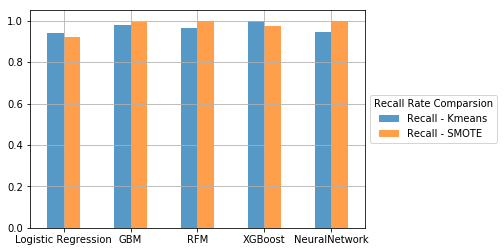

In [70]:
# LR, GBM ,RFM,-XGBoost, NeuralNetwork
Recall_Kmeans = [log_kmeans_recall, gbm_kmeans_recall, rf_kmeans_recall,xgb_kmeans_recall,nn_kmeans_recall]
Recall_SMOTE = [log_smote_recall, gbm_smote_recall, rf_smote_recall,xgb_smote_recall,nn_smote_recall]
df_summary = pd.DataFrame({"Recall - Kmeans":Recall_Kmeans,"Recall - SMOTE":Recall_SMOTE})
df_summary.index = ["Logistic Regression","GBM","RFM","XGBoost","NeuralNetwork"]
df_summary.plot.bar(rot = 0,alpha=0.75,)
plt.grid(zorder=0)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5),title = "Recall Rate Comparsion")

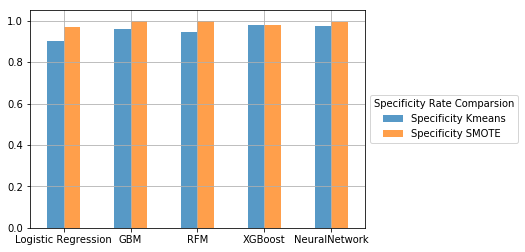

In [72]:
# LR, GBM ,RFM,-XGBoost, NeuralNetwork
Spec_Kmeans = [log_kmeans_spec, gbm_kmeans_spec, rf_kmeans_spec,xgb_kmeans_spec,nn_kmeans_spec]
Spec_SMOTE = [log_smote_spec, gbm_smote_spec, rf_smote_spec,xgb_smote_spec,nn_smote_spec]
df_summary = pd.DataFrame({"Specificity Kmeans":Spec_Kmeans,"Specificity SMOTE":Spec_SMOTE})
df_summary.index = ["Logistic Regression","GBM","RFM","XGBoost","NeuralNetwork"]
df_summary.plot.bar(rot = 0,alpha=0.75,)
plt.grid(zorder=0)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5),title = "Specificity Rate Comparsion")

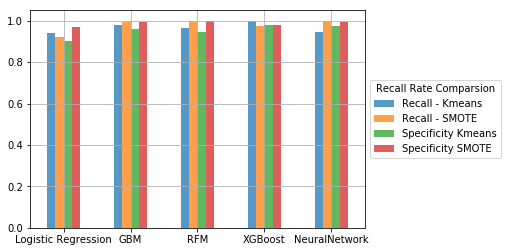

In [75]:
# LR, GBM ,RFM,-XGBoost, NeuralNetwork
Recall_Kmeans = [log_kmeans_recall, gbm_kmeans_recall, rf_kmeans_recall,xgb_kmeans_recall,nn_kmeans_recall]
Recall_SMOTE = [log_smote_recall, gbm_smote_recall, rf_smote_recall,xgb_smote_recall,nn_smote_recall]
Spec_Kmeans = [log_kmeans_spec, gbm_kmeans_spec, rf_kmeans_spec,xgb_kmeans_spec,nn_kmeans_spec]
Spec_SMOTE = [log_smote_spec, gbm_smote_spec, rf_smote_spec,xgb_smote_spec,nn_smote_spec]

df_summary = pd.DataFrame({"Recall - Kmeans":Recall_Kmeans,"Recall - SMOTE":Recall_SMOTE,
                           "Specificity Kmeans":Spec_Kmeans,"Specificity SMOTE":Spec_SMOTE
                          })
df_summary.index = ["Logistic Regression","GBM","RFM","XGBoost","NeuralNetwork"]
df_summary.plot.bar(rot = 0,alpha=0.75,)
plt.grid(zorder=0)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5),title = "Recall Rate Comparsion")

In [76]:
df_summary

,Recall - Kmeans,Recall - SMOTE,Specificity Kmeans,Specificity SMOTE
Logistic Regression,0.940789,0.919224,0.902778,0.970682
GBM,0.979452,0.995786,0.960000,0.996013
RFM,0.965753,0.999965,0.946667,0.999671
XGBoost,1.000000,0.973309,0.979167,0.979167
NeuralNetwork,0.945205,0.999848,0.973333,0.991709


Comparing Recall Rate, we can see that XGBoost achieves the highest recall rate on undersampled dataset while Gradient Boosting Model, Random Forest Model and Neural Network achieve good rate on oversampled dataset. For Specificity Rate, these four models also perform well on specific datasets - undersampled/oversampled. 

Since undersampled dataset would definitely cause information loss, I will focus more on the model performing well on SMOTE dataset.
We can see that Random Forest Model achieves the highest value for both of Recall Rate and Specificity Rate on SMOTE dataset.

Therefore, I will select **Random Forest Model** as the best single model.